In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)
from sklearn.decomposition import PCA

# Константы
RANDOM_STATE = 42
DATA_PATH = "data/"
FIGURES_PATH = "artifacts/figures/"
os.makedirs(FIGURES_PATH, exist_ok=True)

# Загрузка данных
df1 = pd.read_csv("S07-hw-dataset-01.csv")
df2 = pd.read_csv("S07-hw-dataset-02.csv")
df3 = pd.read_csv("S07-hw-dataset-03.csv")

datasets = {"Dataset_01": df1, "Dataset_02": df2, "Dataset_03": df3}

In [ ]:
# Константы эксперимента
RANDOM_STATE = 42
FIGURES_PATH = "artifacts/figures/"
os.makedirs(FIGURES_PATH, exist_ok=True)

# Загрузка данных (2.3.1)
df1 = pd.read_csv("S07-hw-dataset-01.csv").drop(columns=["sample_id"], errors="ignore")
df2 = pd.read_csv("S07-hw-dataset-02.csv").drop(columns=["sample_id"], errors="ignore")
df3 = pd.read_csv("S07-hw-dataset-03.csv").drop(columns=["sample_id"], errors="ignore")


In [ ]:
def perform_eda(df, name):
    print(f"\n--- EDA: {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Missing values: {df.isna().sum().sum()}")
    print(f"Dtypes:\n{df.dtypes.value_counts()}")
    display(df.describe().T)


def evaluate_clustering(X, labels):
    # Метрики можно считать, только если кластеров > 1 и это не только шум
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return {"silhouette": -1, "db_index": float("inf"), "calinski": 0}

    return {
        "silhouette": silhouette_score(X, labels),
        "db_index": davies_bouldin_score(X, labels),
        "calinski": calinski_harabasz_score(X, labels),
    }


In [33]:
# Запуск EDA
for name, df in datasets.items():
    perform_eda(df, name)


--- EDA: Dataset_01 ---
Shape: (12000, 9)
Missing values: 0
Dtypes:
float64    8
int64      1
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
sample_id,12000.0,5999.500000,3464.245950,0.000000,2999.750000,5999.500000,8999.250000,11999.000000
f01,12000.0,-2.424716,11.014315,-19.912573,-9.472623,-6.869404,0.523841,24.403381
f02,12000.0,19.107804,60.790338,-92.892652,-40.282955,54.069335,70.280739,112.229523
f03,12000.0,-0.222063,0.500630,-1.590979,-0.125145,-0.031753,0.054980,0.512277
f04,12000.0,-8.284501,59.269838,-134.303679,-48.345007,16.211728,28.067178,75.088604
f05,12000.0,-0.190717,7.026435,-11.869169,-5.132473,0.444730,3.942368,13.717091
f06,12000.0,0.962972,14.794713,-20.521164,-8.807706,-6.134169,2.334426,41.452857
f07,12000.0,0.033724,59.541782,-215.098834,-39.900520,-0.578494,39.719821,213.381767
f08,12000.0,0.007638,0.607053,-2.633469,-0.401483,0.005306,0.410132,2.490745



--- EDA: Dataset_02 ---
Shape: (8000, 4)
Missing values: 0
Dtypes:
float64    3
int64      1
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
sample_id,8000.0,3999.500000,2309.545410,0.000000,1999.750000,3999.500000,5999.250000,7999.000000
x1,8000.0,0.478867,0.955138,-2.487352,-0.116516,0.490658,1.085263,2.987555
x2,8000.0,0.241112,0.663195,-2.499237,-0.242357,0.241092,0.726526,2.995553
z_noise,8000.0,0.110454,8.097716,-34.056074,-5.392210,0.132470,5.655605,29.460076



--- EDA: Dataset_03 ---
Shape: (15000, 5)
Missing values: 0
Dtypes:
float64    4
int64      1
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
sample_id,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
x1,15000.0,1.246296,4.592421,-9.995585,-1.782144,0.664226,4.435671,16.207863
x2,15000.0,1.033764,4.710791,-9.980853,-2.666393,1.831257,4.969630,14.271153
f_corr,15000.0,0.212776,1.530017,-5.212038,-0.966224,0.296508,1.390273,5.795876
f_noise,15000.0,-0.027067,2.506375,-8.785884,-1.731128,-0.052391,1.673831,11.266865


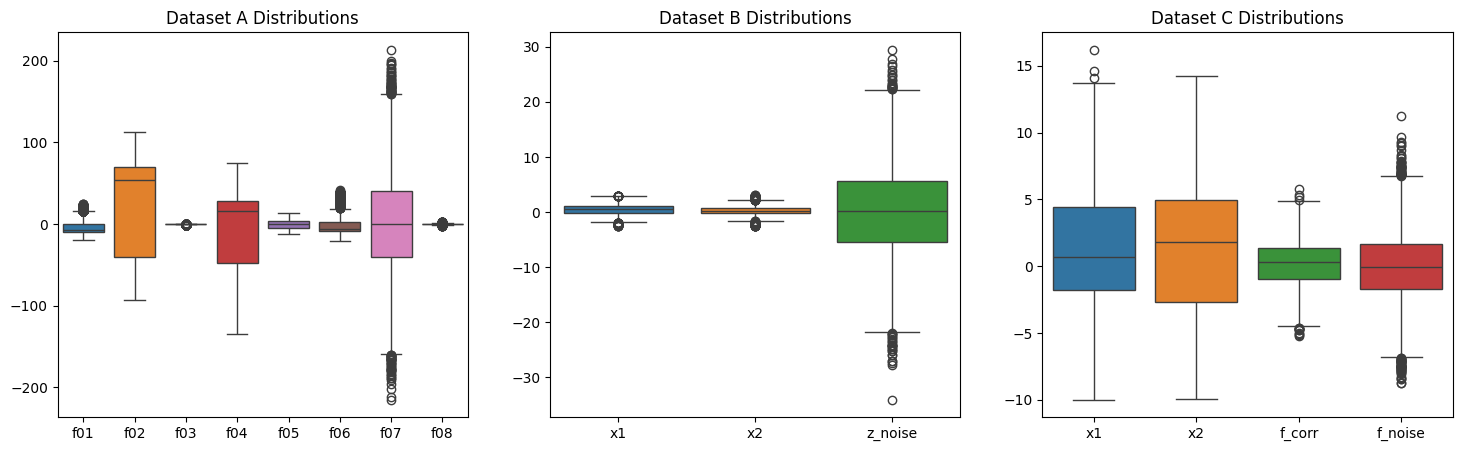

In [ ]:
# Отрисовка boxplot для оценки выбросов и разности шкал перед скейлингом
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df1, ax=axes[0]).set_title("Dataset A Distributions")
sns.boxplot(data=df2, ax=axes[1]).set_title("Dataset B Distributions")
sns.boxplot(data=df3, ax=axes[2]).set_title("Dataset C Distributions")
plt.savefig("artifacts/figures/eda_combined_boxplots.png")


Выполняю кластеризацию для Dataset_01...
            algo  silhouette  db_index     calinski
0         KMeans    0.335687  1.158004  7782.435064
1         DBSCAN   -0.304294  1.287182   193.056774
2  Agglomerative    0.335687  1.158004  7782.435064


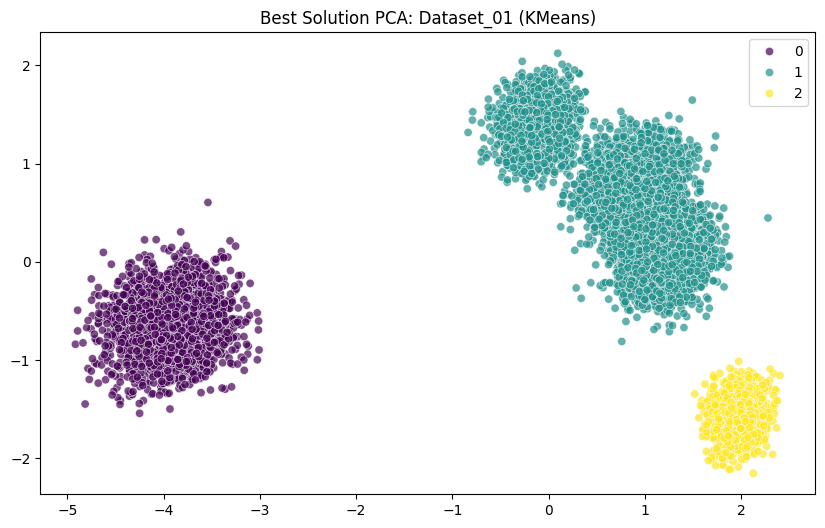


Выполняю кластеризацию для Dataset_02...
            algo  silhouette  db_index     calinski
0         KMeans    0.204564  1.503541  2080.581356
1         DBSCAN   -0.044367  1.512842    50.139151
2  Agglomerative    0.133262  1.878445  1417.964297


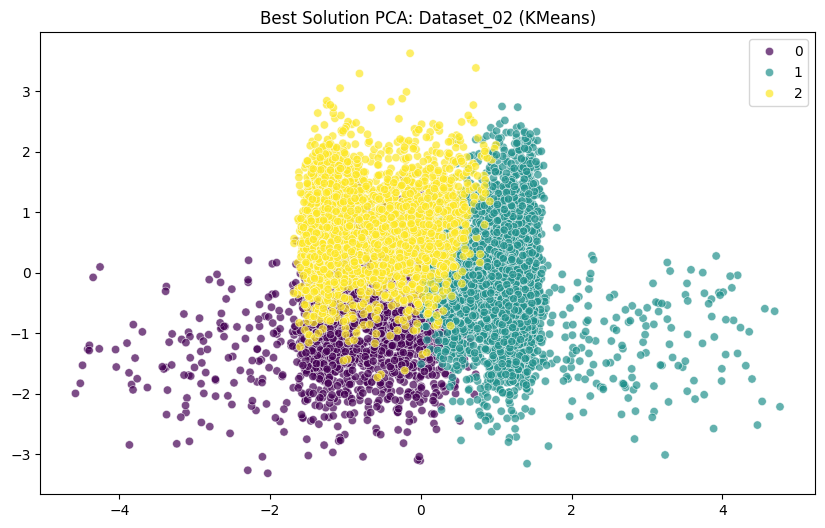


Выполняю кластеризацию для Dataset_03...
            algo  silhouette  db_index     calinski
0         KMeans    0.347839  1.177711  7791.329333
1         DBSCAN   -0.119224  2.048436   309.340315
2  Agglomerative    0.343704  1.169642  7581.562535


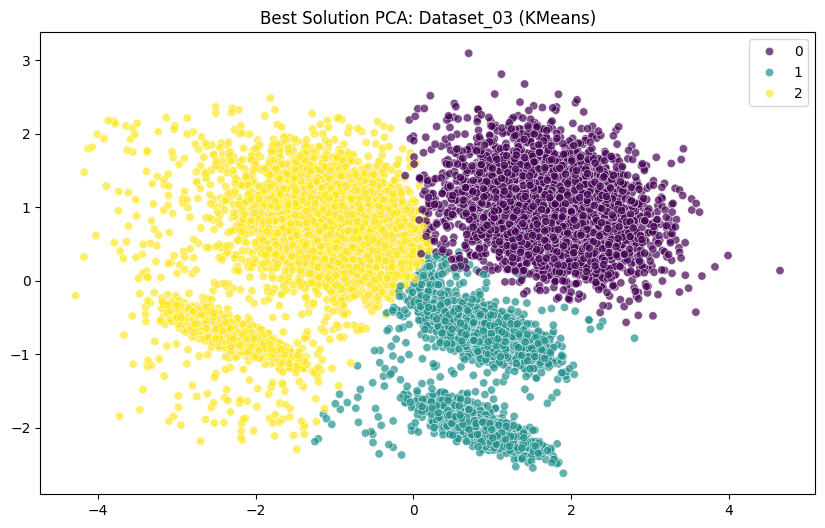

In [ ]:
best_results = {}

for name, df in datasets.items():
    print(f"\nВыполняю кластеризацию для {name}...")

    # 1. Препроцессинг (Scaling обязателен по критериям)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # 2. Определение алгоритмов (KMeans и DBSCAN/Agglomerative)
    # Параметры подобраны примерно, для Dataset_02 (нелинейный) лучше сработает DBSCAN
    models = {
        "KMeans": KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10),
        "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
        "Agglomerative": AgglomerativeClustering(n_clusters=3),
    }

    results = []
    for algo_name, model in models.items():
        labels = model.fit_predict(X_scaled)
        metrics = evaluate_clustering(X_scaled, labels)
        metrics["algo"] = algo_name
        metrics["labels"] = labels
        results.append(metrics)

    # Сравнение
    res_df = pd.DataFrame(results)
    print(res_df[["algo", "silhouette", "db_index", "calinski"]])

    # Выбор лучшего по Silhouette
    best_idx = res_df["silhouette"].idxmax()
    best_algo = res_df.loc[best_idx]
    best_results[name] = best_algo

    # 3. PCA Визуализация для лучшего решения
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=best_algo["labels"],
        palette="viridis",
        alpha=0.7,
    )
    plt.title(f"Best Solution PCA: {name} ({best_algo['algo']})")
    plt.savefig(f"{FIGURES_PATH}{name}_pca_best.png")
    plt.show()

# В папке figures теперь будут лежать графики

In [ ]:
print("\n--- Проверка устойчивости (Dataset_01) ---")
seeds = [0, 42, 123, 1000, 2024]
stb_metrics = []

X_stb = StandardScaler().fit_transform(df1)

for s in seeds:
    km = KMeans(n_clusters=3, random_state=s, n_init=10)
    labels = km.fit_predict(X_stb)
    sil = silhouette_score(X_stb, labels)
    stb_metrics.append(sil)
    print(f"Seed {s}: Silhouette = {sil:.4f}")

std_val = np.std(stb_metrics)
print(f"Стандартное отклонение метрики: {std_val:.6f}")

if std_val < 0.05:
    print("Вывод: Решение устойчиво.")
else:
    print("Вывод: Решение чувствительно к начальной инициализации.")


--- Проверка устойчивости (Dataset_01) ---
Seed 0: Silhouette = 0.3968
Seed 42: Silhouette = 0.3968
Seed 123: Silhouette = 0.3968
Seed 1000: Silhouette = 0.3968
Seed 2024: Silhouette = 0.3968
Стандартное отклонение метрики: 0.000000
Вывод: Решение устойчиво.


In [ ]:
import json

summary = {}
for name, data in best_results.items():
    summary[name] = {
        "best_algo": data["algo"],
        "metrics": {
            "silhouette": float(data["silhouette"]),
            "db_index": float(data["db_index"]),
            "calinski": float(data["calinski"]),
        },
    }

with open("artifacts/clustering_results.json", "w") as f:
    json.dump(summary, f, indent=4)

print("Результаты сохранены в artifacts/clustering_results.json")

Результаты сохранены в artifacts/clustering_results.json
